In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Embedding,SimpleRNN,Dense

In [2]:
## load the imdb dataset 
max_features = 10000 ## vocabulary size
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
print(f'training data shape:{x_train.shape},training labels shape:{y_train.shape}')
print(f'testing data shape:{x_test.shape},testing labels shape:{y_test.shape}')

training data shape:(25000,),training labels shape:(25000,)
testing data shape:(25000,),testing labels shape:(25000,)


In [3]:
sample_review = x_train[0]
sample_label = y_train[0]
print(f'sample review as integers :{sample_review}')
print(f'sample label :{sample_label}')

sample review as integers :[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
sample label :1


In [4]:
## mapping of word index back to words (for understanding)
word_index = imdb.get_word_index()
#word_index
## to print in reverse order i mean in value: key pair 
reverse_word_index = {value:key for key ,value in word_index.items()}
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [5]:
from tensorflow.keras.preprocessing import sequence
max_len = 500
x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test = sequence.pad_sequences(x_test,maxlen=max_len)
x_train
## by default isne yha  par pre padding kiya ha 

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [8]:
## train simple rnn 
model=Sequential()
model.add(Embedding(max_features,128,input_length=max_len))
model.add(SimpleRNN(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Watawaran\first\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
earlystopping

In [19]:

history=model.fit(
    x_train,y_train,epochs=10,batch_size=32,
    validation_split=0.2,
    callbacks=[earlystopping]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.9578 - loss: 0.1204 - val_accuracy: 0.8518 - val_loss: 0.3892
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.9649 - loss: 0.1041 - val_accuracy: 0.8500 - val_loss: 0.4092
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.9694 - loss: 0.0904 - val_accuracy: 0.8504 - val_loss: 0.4325
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.9759 - loss: 0.0801 - val_accuracy: 0.8526 - val_loss: 0.4654
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9788 - loss: 0.0642 - val_accuracy: 0.8508 - val_loss: 0.4795


NameError: name 'plt' is not defined

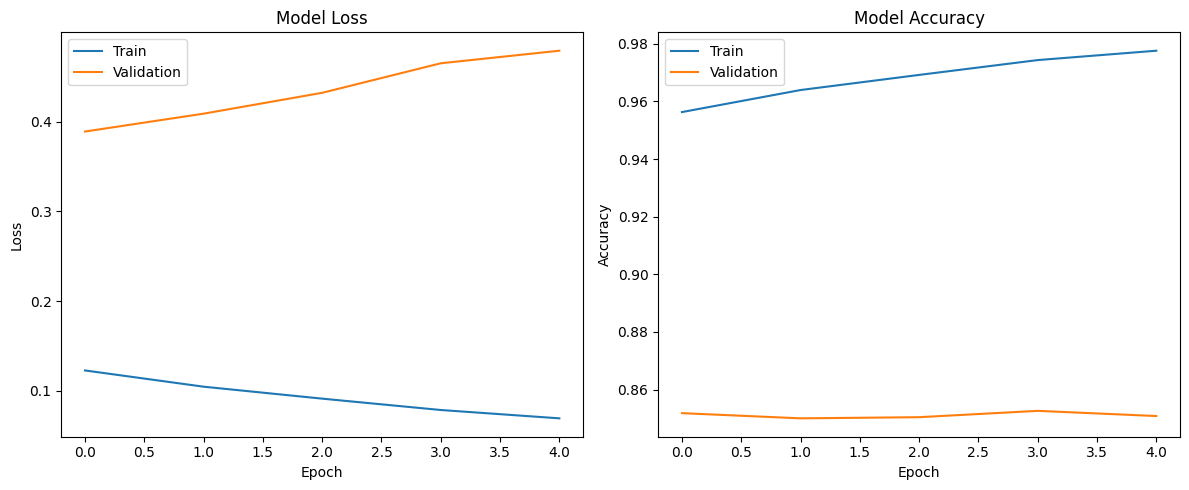

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

In [21]:
model.save('simple_rnn_ritesh.h5')